# Tensor Network Renderer
by Glen Evenbly, [glenevenbly.com](https://glenevenbly.com), (8/5/2021)

**Description:** creates a diagram of a tensor network from the standard `ncon` format, providing a convenient way to visualize networks. 

In addition to generating figures, the network renderer also checks the *consistancy* of a network, such that it can identify common definition errors (e.g. mismatches between tensor shapes and their prescribed number of indices). The renderer can also display the contraction costs of evaluating the network. 



In [1]:
# Install glens tensor algorithm library (only for 1st time)
!git clone https://github.com/gevenbly/TensorAlgs

Cloning into 'TensorAlgs'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 153 (delta 85), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (153/153), 355.10 KiB | 10.15 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [2]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
os.chdir('/content/TensorAlgs')
%run ./network_render.ipynb
%run ./network_contract.ipynb

# Example-1: The Basics
The only necessary information required to generate a diagram is the set of index `connects`, input in the standard `ncon` format. The `connects` can be specified with integer or string labels, or a mixture of both. Given only the `connects` the renderer will then generate default locations, names and colors of each tenor.




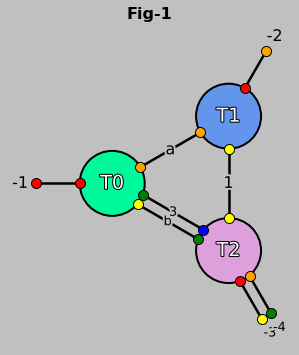

In [3]:
# Example 1
connects = [[-1,'a','b',3], [-2,'a',1], [-3,-4,1,'b',3]]

# render the network
fig1 = draw_network(connects, title='Fig-1')

# Example-2: Tensor Shapes and Positions
Positions of tensors can be specified using the optional `coords` input.

*   The simplest option is to provide an (x,y) coord for each tensor. In this case each tensor will be drawn as a circle centered at the coord (where the default radius can be configured with the `circ_rad` input).

*   Alternatively four coords (x0,y0,x1,y1) can be given for a tensor, in which case the tensor will be drawn as a rectangle with (x0,y0) and (x1,y1) as opposite corners.

The user can also specify tensor `names` as a list of strings and tensor `colors` as list of ints (which reference entries in a built-in color palette). 

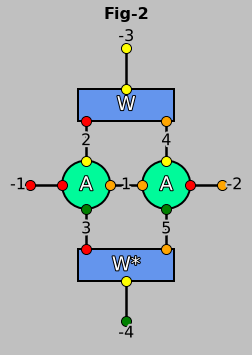

In [4]:
# Example 2: define network properties
connects = [[-1,1,2,3], [-2,1,4,5], [2,4,-3], [3,5,-4]]
coords = [(0,0), (1,0), (-0.1,0.8,1.1,1.2), (-0.1,-0.8,1.1,-1.2)]
names = ['A','A','W','W*']
colors = [0,0,1,1]

# render the network
fig2 = draw_network(connects, title='Fig-2', figsize=6, 
                    coords=coords, names=names, colors=colors)

# Example-3: Color Encoding of Index Order
Notice in the previous examples the small circular tags appear at the end of each index; these are used to encode the index ordering on each tensor and follow a rainbow order of colors, **ROYGBIV** (Red, Orange, Yellow, Green, Blue, Indigo, Violet). So the ***red*** colored tag attached to a tensor always denotes the 1st index of that tensor, while the ***orange*** denotes the 2nd, *etc*. Thus, in general, the `connects` can be unambiguously reconstructed from diagram alone (i.e. the diagram contains the full information about the ordering of indices on each tensor).

*   If an individual tensor has more than 7 indices, then the same color cycle repeats for higher indices but with ***triangular*** tags instead of ***circular*** ones.

*   The same color convention for the ***open*** indices of a network, where the colors denote the index order on the final tensor resulting from the network contraction. 

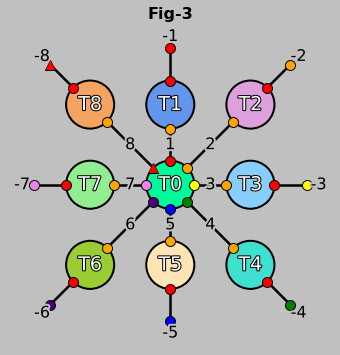

In [5]:
# Example-3: tag colors
connects = [[1,2,3,4,5,6,7,8], [-1,1], [-2,2], [-3,3], [-4,4], [-5,5], 
            [-6,6], [-7,7], [-8,8]]
coords = [(0,0), (0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1), 
         (-1,0), (-1,1)]

# render the networks
fig3 = draw_network(connects, title='Fig-3', coords=coords)

# Example 4: Contraction Order and Costs
The renderer is also capable of analyzing the contraction costs of a network if the `show_costs` input flag is set to `True`. The cost of each contraction appears in a legend to the right of the figure, whose x-position can be adjusted via the optional `legend_extend` input. 

*   Tensor `dims` can be provided numerically as integers or symbolically as strings (or a mixture of both). If no `dims` are provided then all indices are assumed to be of uniform dimension `d`.

*   The contraction `order` can be provided as a list over the internal network indices. If no explicit `order` is provided then the `ncon` default is used: alphabetical ordering of string labels followed by increasing order of integer labels. 

*   Index colors are used to indicate the order that indices are contracted, following the same **ROYGBIV** order used for index tags. If more than seven contractions are needed, then the index colors are repeated but as dashed lines.  







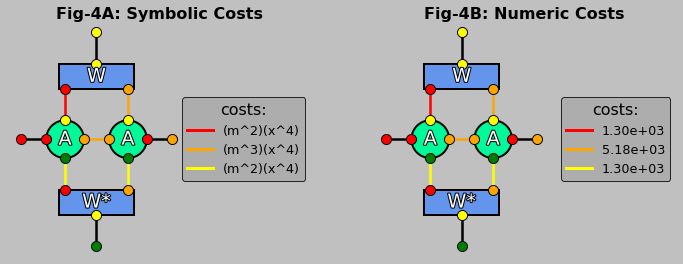

In [6]:
# Example-4A: Contraction Costs
connects = [[-1,1,2,3], [-2,1,4,5], [2,4,-3], [3,5,-4]]
coords = [(0,0), (1,0), (-0.1,0.8,1.1,1.2), (-0.1,-0.8,1.1,-1.2)]
names = ['A','A','W','W*']
colors = [0,0,1,1]
order = [2,1,4,3,5]

# make dims
Adim0 = ('m','m','x','x')
Wdim0 = ('x','x','x')
dims0 = [Adim0,Adim0,Wdim0,Wdim0]

Adim1 = (4,4,3,3)
Wdim1 = (3,3,3)
dims1 = [Adim1,Adim1,Wdim1,Wdim1]

# draw_networks (pre-initialize fig in order to enable subplots)
fig = plt.figure(figsize=(12,12))
fig4a = draw_network(connects, coords=coords, names=names, colors=colors, 
             order=order, title='Fig-4A: Symbolic Costs', dims=dims0, 
             draw_labels=False, show_costs=True, subplot=121, fig=fig)
fig4b = draw_network(connects, coords=coords, names=names, colors=colors, 
             order=order, title='Fig-4B: Numeric Costs', dims=dims1, 
             draw_labels=False, show_costs=True, subplot=122, fig=fig)

# Example 5: Boundary Tensors
One can also specify a single tensor as a ***boundary*** tensor that wraps around the rest of the network, achieved by only providing only a single value in the `coords` for that tensor. Use of a ***boundary*** tensor can simply certain diagrams that would otherwise require overlapping indices, as demonstrated in the example below for a network from the MERA.  

*   The value provided to `coords` is used to specify the thickness of the boundary tensor, rather than its position.

*   The optional parameter `env_pad` can be used to provide (x,y) values to adjust the gap between the network and the boundary tensor.
 


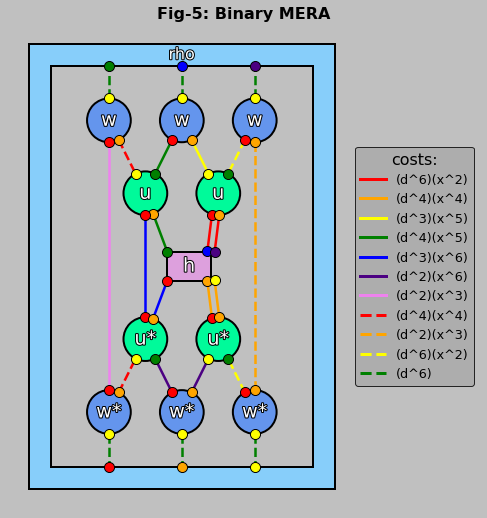

In [7]:
# Example-5: Boundary Tensors
names = ['u','u','w','w','w','h','u*','u*','w*','w*','w*','rho']
connects = [[1, 3, 10, 11], [4, 7, 12, 13], [8, 10, 21], [11, 12, 22],
            [13, 14, 23], [2, 5, 6, 3, 4, 7], [1, 2, 9, 17], [5, 6, 16, 15],
            [8, 9, 18], [17, 16, 19], [15, 14, 20], [18, 19, 20, 21, 22, 23]]
order = [4,7,5,6,12,11,3,1,2,17,16,8,10,9,14,13,15,18,19,20,21,22,23]
coords = [(-0.5, 1), (0.5, 1), (-1, 2), (0, 2), (1, 2), (-0.2,-0.2,0.4,0.2), 
          (-0.5, -1), (0.5, -1), (-1, -2), (0, -2), (1, -2), (0.3)]
colors = [0,0,1,1,1,2,0,0,1,1,1,3]
# make dims
udim = ('d','d','x','x')
wdim = ('x','x','d')
hamdim = ('d','d','d','d','d','d')
rhodim = ('d','d','d','d','d','d')
dims = [udim,udim,wdim,wdim,wdim,hamdim,udim,udim,wdim,wdim,wdim,rhodim]

# draw_networks
fig5 = draw_network(connects, coords=coords, names=names, colors=colors, 
                    order=order, title='Fig-5: Binary MERA', draw_labels=False, 
                    dims=dims, show_costs=True, env_pad=(-0.2,-0.25),
                    legend_extend=2.0, figsize=9)

# Example 6: Tensor Environments
The renderer is also suitable for displaying tensor environments (or single tensor derivatives) from a closed network. In the example below we use the `ncon_remove` function to remove a single tensor from the network of previous example and the render the result. The coordinates of the removed tensor can be provided via the optional `vacant_coord`, which ensures that the free ends of the open indices remain in their previous locations.

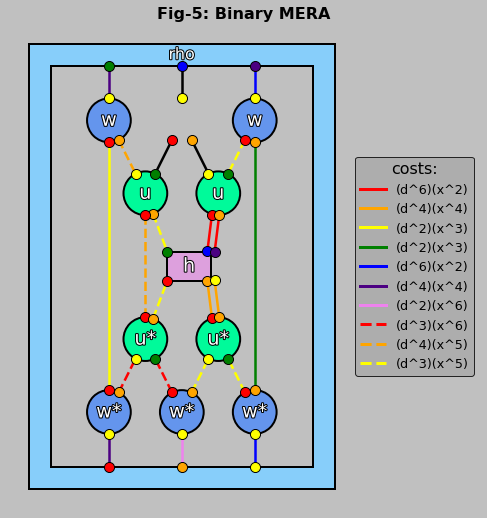

In [12]:
# Example-6: Environment Tensors
names = ['u','u','w','w','w','h','u*','u*','w*','w*','w*','rho']
connects = [[1, 3, 10, 11], [4, 7, 12, 13], [8, 10, 21], [11, 12, 22],
            [13, 14, 23], [2, 5, 6, 3, 4, 7], [1, 2, 9, 17], [5, 6, 16, 15],
            [8, 9, 18], [17, 16, 19], [15, 14, 20], [18, 19, 20, 21, 22, 23]]
order = [4,7,5,6,12,11,3,1,2,17,16,8,10,9,14,13,15,18,19,20,21,22,23]
coords = [(-0.5, 1), (0.5, 1), (-1, 2), (0, 2), (1, 2), (-0.2,-0.2,0.4,0.2), 
          (-0.5, -1), (0.5, -1), (-1, -2), (0, -2), (1, -2), (0.3)]
colors = [0,0,1,1,1,2,0,0,1,1,1,3]
# make dims
udim = ('d','d','x','x')
wdim = ('x','x','d')
hamdim = ('d','d','d','d','d','d')
rhodim = ('d','d','d','d','d','d')
dims = [udim,udim,wdim,wdim,wdim,hamdim,udim,udim,wdim,wdim,wdim,rhodim]

# remove a single tensor from the network
which_env = 3
new_connects, new_order = ncon_remove(connects, which_env, order=order)
vacant_coord = coords.pop(which_env)
dims.pop(which_env)
names.pop(which_env)
colors.pop(which_env)

# draw_networks
fig5 = draw_network(new_connects, coords=coords, names=names, colors=colors, 
                    order=new_order, title='Fig-5: Binary MERA', draw_labels=False, 
                    dims=dims, show_costs=True, env_pad=(-0.2,-0.25),
                    legend_extend=2.0, figsize=9, vacant_coord=vacant_coord)

# Example 7: Interactive Figures
Throught use of `ipywidgets` the configuration options of the network rendered can be adjusted interactively by calling the `draw_network_interactive` function. Note that this function takes no inputs; instead the network data, such as the `connects` and `coords` show be encapsulated within a separate `draw_config` function as demonstrated below. 

In [13]:
def draw_config(fontsize=16, tagsize=8, legend_extend=1.5, 
                figsize=16, circ_rad=0.3, linewidth=2.5,
                show_costs=False, draw_labels=True,
                bkg_col='silver', spacing=0.125):

  #########################################
  # Your config options go here
  names = ['u','u','w','w','w','h','u*','u*','w*','w*','w*','rho']
  connects = [[1, 3, 10, 11], [4, 7, 12, 13], [8, 10, 21], [11, 12, 22],
              [13, 14, 23], [2, 5, 6, 3, 4, 7], [1, 2, 9, 17], [5, 6, 16, 15],
              [8, 9, 18], [17, 16, 19], [15, 14, 20], [18, 19, 20, 21, 22, 23]]
  order = [4,7,5,6,12,11,3,1,2,17,16,8,10,9,14,13,15,18,19,20,21,22,23]
  coords = [(-0.5, 1), (0.5, 1), (-1, 2), (0, 2), (1, 2), (-0.2,-0.2,0.4,0.2), 
            (-0.5, -1), (0.5, -1), (-1, -2), (0, -2), (1, -2), (0.3)]
  colors = [0,0,1,1,1,2,0,0,1,1,1,3]
  udim = ('d','d','x','x')
  wdim = ('x','x','d')
  hamdim = ('d','d','d','d','d','d')
  rhodim = ('d','d','d','d','d','d')
  dims = [udim,udim,wdim,wdim,wdim,hamdim,udim,udim,wdim,wdim,wdim,rhodim]
  title = 'Ex: Interactive Figs'
  #########################################

  draw_network(connects, names=names, coords=coords, colors=colors, order=order,
               dims=dims, circ_rad=circ_rad, fontsize=fontsize, tagsize=tagsize, 
               draw_labels=draw_labels, title=title, bkg_col=bkg_col,
               show_costs=show_costs, legend_extend=legend_extend, 
               spacing=spacing, linewidth=linewidth, figsize=figsize)
  return

# draw the networks
draw_network_interactive()